# Correlation time phase transition
The concentration dependence of correlation time is reminescent of a phase transition. In this notebook, we try to fit the low concentration increase of correlation time with a power law.

In [60]:
import pandas as pd
import numpy as np
import os
import typesetting.main as tm
from log import experiment_log
from corr_utils import *
import matplotlib
from scipy.optimize import curve_fit
import matplotlib.ticker as mticker
from myImageLib import wowcolor

In [4]:
color_dict, marker_list = unified_symbols() # keep color and symbol consistent across different plot, for same concentrations
data_master_dir = 'H:\\' # data folder: Google drive for now, but may change in the future
tm.prl('1-column-2-panel') # control the default plotting configurations, now I realize the parameters should vary from plot to plot
# dirs = data_log_mapping(kw='aug') # video info for GNF raw data, obtained from Aug 3rd to Aug 6th
log_df = experiment_log()
n0_to_vf = 0.08
matplotlib.rcParams['text.usetex'] = True

-------The log looks OK!--------


Text(0, 0.5, '$\\tau_v$ (s)')

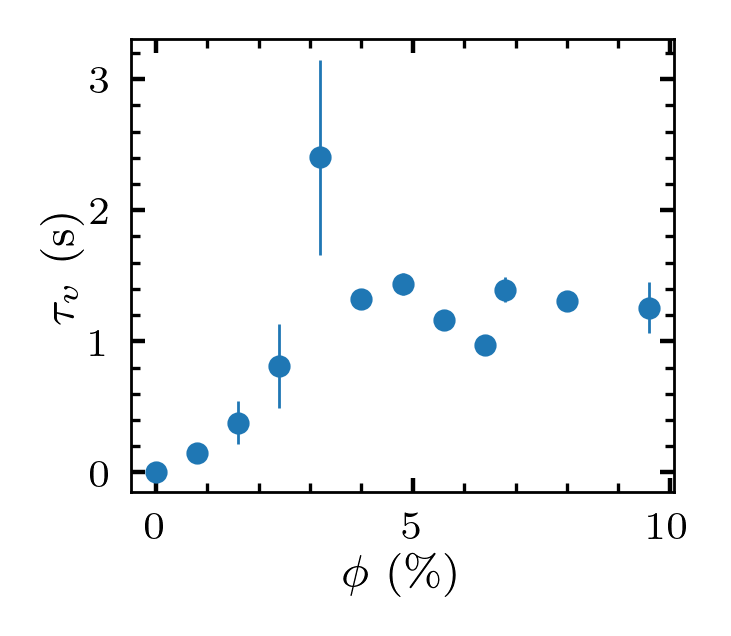

In [5]:
cl_df = pd.read_csv(os.path.join(data_master_dir, 
                          r'Research projects\DF\data\autocorrelation\velocity_autocorrelation_time.csv')).set_index('conc')
fig, ax = plt.subplots()
ax.errorbar(cl_df.index*0.08, cl_df['avg'], yerr=cl_df['err'],
            ls='', marker='o', markersize=3, elinewidth=0.5)
ax.set_xlabel('$\phi$ (\%)')
ax.set_ylabel('$\\tau_v$ (s)')

In [36]:
def power_law(x, a, b):
    return b * (4-x) ** a

In [34]:
# generate data
data = cl_df[['avg', 'err']][1:5]
x = np.array(data.index*n0_to_vf)
y = np.array(data.avg)

In [21]:
x

array([0.8, 1.6, 2.4, 3.2])

In [37]:
popt, pcov = curve_fit(power_law, x, y, p0=[5, 0.5])

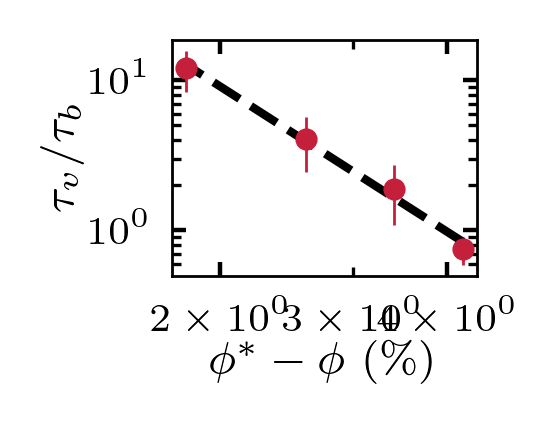

In [67]:
phic = 5
tb = 0.2 # s
fig, ax = plt.subplots(figsize=(1.4, 1.1))
xfit = np.linspace(x[0], x[-1], 100)
ax.errorbar(phic - x, y/tb, yerr=data.err/tb, lw=0.5, ls='', marker='o', markersize=3, color=wowcolor(0))
# ax.plot(xfit, power_law(xfit, *popt), color='red', ls='--', lw=1)
ax.set_xlabel('$\phi^*-\phi$ (\%)')
ax.set_ylabel('$\\tau_v/\\tau_b$')

# ax.set_title('$\phi^*$={:.2f}'.format(phic))
# ax.xaxis.set_minor_formatter(mticker.ScalarFormatter())
ax.loglog()
# ax.text(0, 2, '$0.13 \\times (x-0.4)^{2.8}$', fontsize=3)

p = np.polyfit(np.log(phic - x), np.log(y/tb), deg=1)
ax.plot(phic-xfit, np.exp(p[0]*np.log(phic-xfit)+p[1]), ls='--', color='black')
ax.set_xticks([2, 4])
plt.tight_layout()
fig.savefig(os.path.join(data_master_dir, r'Research projects\DF\Figures\spatiotemporal-correlations\critical.pdf'))

Text(0.5, 1.0, '$\\phi^*$=0.40')

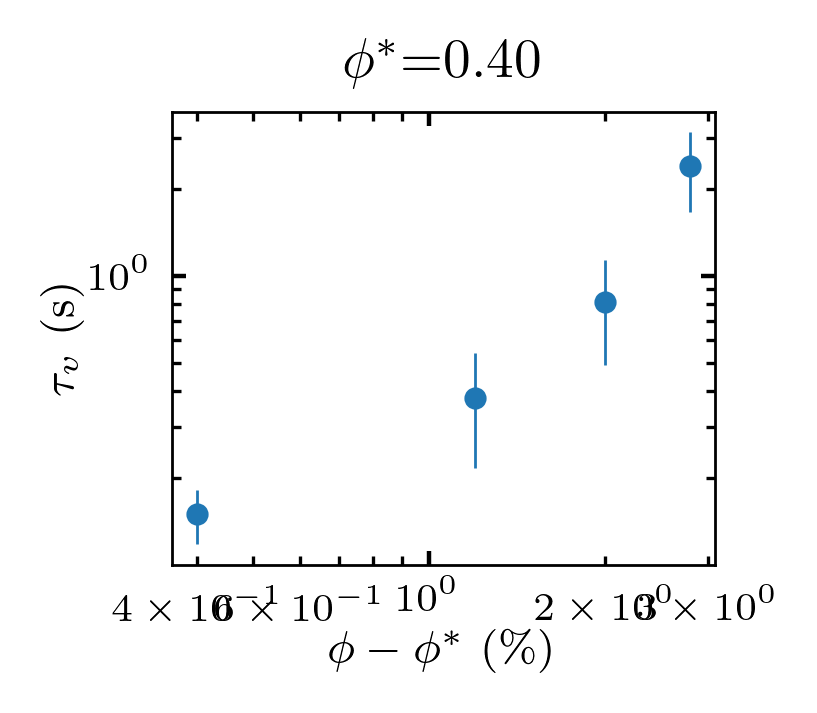

In [12]:
phic = 0.4

fig, ax = plt.subplots()
xfit = np.linspace(x[0], x[-1], 100)
ax.errorbar(x-phic, y, yerr=data.err, lw=0.5, ls='', marker='o', markersize=3)
# ax.plot(xfit, power_law(xfit, *popt), color='red', ls='--', lw=1)
ax.set_xlabel('$\phi-\phi^*$ (\%)')
ax.set_ylabel('$\\tau_v$ (s)')
ax.loglog()
ax.set_title('$\phi^*$={:.2f}'.format(phic))
# ax.text(0, 2, '$0.13 \\times (x-0.4)^{2.8}$', fontsize=3)

Text(0.5, 1.0, '$\\phi^*$=0.70')

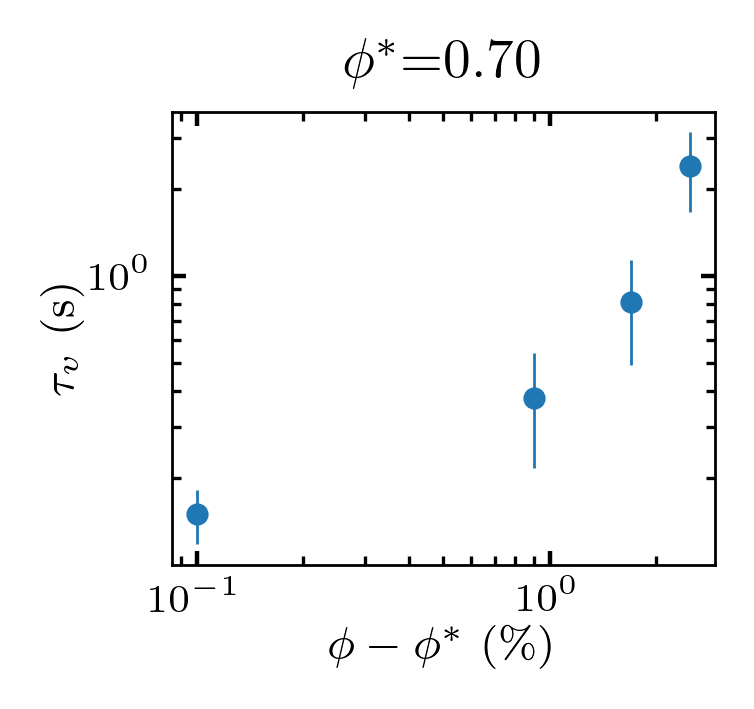

In [11]:
phic = 0.7

fig, ax = plt.subplots()
xfit = np.linspace(x[0], x[-1], 100)
ax.errorbar(x-phic, y, yerr=data.err, lw=0.5, ls='', marker='o', markersize=3)
# ax.plot(xfit, power_law(xfit, *popt), color='red', ls='--', lw=1)
ax.set_xlabel('$\phi-\phi^*$ (\%)')
ax.set_ylabel('$\\tau_v$ (s)')
ax.loglog()
ax.set_title('$\phi^*$={:.2f}'.format(phic))
# ax.text(0, 2, '$0.13 \\times (x-0.4)^{2.8}$', fontsize=3)